In [2]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm/ 

/home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm


In [ ]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt


Q1: Principal component analysis (PCA) - Detailed calculation of a PCA (based on theory)


For the data in Table 1, we ask you to perform the following operations “by hand” (you can use a
calculator, or program each step, but not use a single “PCA” function that calculates everything at
once)

In [ ]:
import numpy as np
# Length and width of a newborn's skull
data = [191, 155, 195, 149, 181, 148, 183, 153, 176, 144, 208, 157, 189, 150,
197, 159, 188, 152, 192, 150, 179, 158, 183, 147, 174, 150, 190, 159, 188,
151, 163, 137, 195, 155, 186, 153, 181, 145, 175, 140, 192, 154, 174, 143,
176, 139, 197, 167, 190, 163]
x1 = [data[i] for i in range(0,len(data),2)]
x2 = [data[i] for i in range(1,len(data),2)]

<Axes: ylabel='Count'>

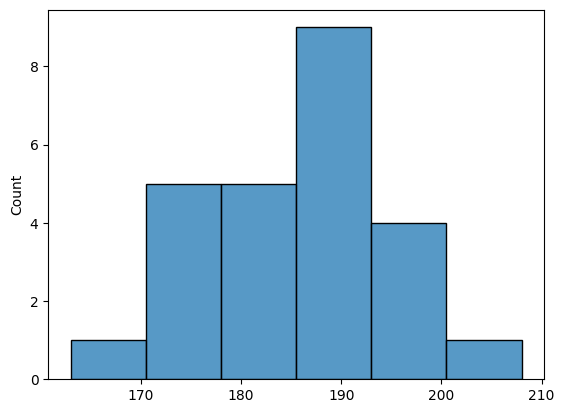

In [15]:
sns.histplot(x1)

(a) Compute the mean vector x̄ and center the initial data. 


In [10]:
x1_centered = x1 - np.mean(x1)
x2_centered = x2 - np.mean(x2)

Do you think it is required to scale the data ?

<Axes: ylabel='Count'>

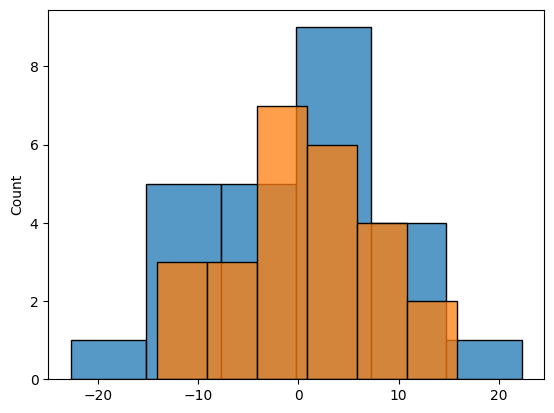

In [29]:
sns.histplot(x1_centered)
sns.histplot(x2_centered)

Compared the ranges of x1​ and x2 to determine if scaling is needed, we can conclude that scaling is required so the features differ slightly in magnitude.

<Axes: ylabel='Count'>

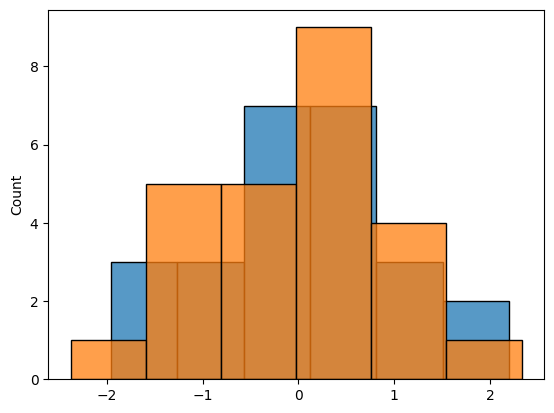

In [37]:
x1_scaled = x1_centered / np.std(x1_centered) 
x2_scaled = x2_centered / np.std(x2_centered)
sns.histplot(x2_scaled)
sns.histplot(x1_scaled)

In [42]:
X = np.vstack((x1_scaled, x2_scaled)).T
print("Centered data: \n", X)

Centered data: 
 [[ 0.55203555  0.53710152]
 [ 0.9702443  -0.29346784]
 [-0.49348633 -0.43189607]
 [-0.28438195  0.26024507]
 [-1.01624726 -0.98560898]
 [ 2.32942274  0.81395798]
 [ 0.34293118 -0.15503962]
 [ 1.17934868  1.09081444]
 [ 0.23837899  0.12181684]
 [ 0.65658774 -0.15503962]
 [-0.7025907   0.95238621]
 [-0.28438195 -0.5703243 ]
 [-1.22535164 -0.15503962]
 [ 0.44748336  1.09081444]
 [ 0.23837899 -0.01661139]
 [-2.3754257  -1.95460658]
 [ 0.9702443   0.53710152]
 [ 0.02927461  0.26024507]
 [-0.49348633 -0.84718076]
 [-1.12079945 -1.53932189]
 [ 0.65658774  0.3986733 ]
 [-1.22535164 -1.12403721]
 [-1.01624726 -1.67775012]
 [ 1.17934868  2.19824026]
 [ 0.44748336  1.64452735]]


(b) Calculate the sample covariance matrix A:

- performing operations manually (cov(X, Y ) = E[(X − E[X])(Y − E[Y ])] = E[XY ] − E[X]E[Y ]) where E[.] denotes the expected value operator.

In [43]:
# Manual covariance calculation
cov_x1x1 = np.sum(x1_scaled * x1_scaled) / (len(x1) - 1)
cov_x1x2 = np.sum(x1_scaled * x2_scaled) / (len(x1) - 1)
cov_x2x2 = np.sum(x2_scaled * x2_scaled) / (len(x2) - 1)

# Sample covariance matrix
cov_matrix_manual = np.array([[cov_x1x1, cov_x1x2],
                               [cov_x1x2, cov_x2x2]])

print("Covariance Matrix (Manual Calculation):\n", cov_matrix_manual)

Covariance Matrix (Manual Calculation):
 [[1.04166667 0.76516202]
 [0.76516202 1.04166667]]


- by performing the matrix operations $X^T X/m$ with m denoting the number of data samples
(i.e., the size of the training set).

In [48]:
cov = (X.T @ X / (len(X) - 1))
cov

array([[1.04166667, 0.76516202],
       [0.76516202, 1.04166667]])

with the cov operation in the numpy package

In [47]:
cov = np.cov(X.T)
cov

array([[1.04166667, 0.76516202],
       [0.76516202, 1.04166667]])

If significant differences appear, explain why. If yes, does it have an impact on the computation
of the top k principal components of data matrix $X ∈ R^{m×n}$ . (If you can’t answer this question,
move on to the others.)

- Scaling Impact: If the ranges of $x1$​ and $x2$​ differ significantly, scaling the data (e.g., dividing by the standard deviation) ensures that the PCA results are not biased toward the feature with a larger variance. Covariances involving those features become disproportionately large, skewing the direction of the principal components.
- Therefore, scaling can significantly impact the computation of the top k principal components
- Differences may arise due to precision or rounding. However, all methods provided equivalent results for this dataset.

(c) calculate the eigenvalues and eigenvectors of A using the command np.linalg.eig(A).

In [49]:
eigen_vals, eigen_vecs = np.linalg.eig(cov)
print("Eigenvalues: ", eigen_vals)
print("Eigenvectors: \n", eigen_vecs)

Eigenvalues:  [1.80682868 0.27650465]
Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


(d) compute the percentage of the variance explained by each eigenvalue.

The eigenvalues represent the amount of variance captured by each principal component. To compute the percentage of variance explained:
$$\text{Percentage Variance Explained}=\frac{\lambda_i}{\sum_{j=1}^n{\lambda_j}} \times 100$$

where $\lambda_i$​ is the $i$-th eigenvalue.

In [51]:
variance_explained = eigen_vals / np.sum(eigen_vals) * 100
variance_explained

array([86.7277768, 13.2722232])

(e) Plot the point cloud $x^{(i)} = (x_1^{(i)} , x_2^{(i)} )^T ∈ R^2$ with 1 ≤ i ≤ m and represent the axes corresponding to
the principal components (v1 , v2 ) on the point cloud. To avoid distorting the perception of proximity
(or perpendicularity between components), use identical scales on the abscissa and ordinate.

In [74]:
# Draw a straight line y = ax + b with the abline(a,b) command.
def abline(slope, intercept, color, label):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    return axes.plot(x_vals, y_vals, '--', color=color, label=label)

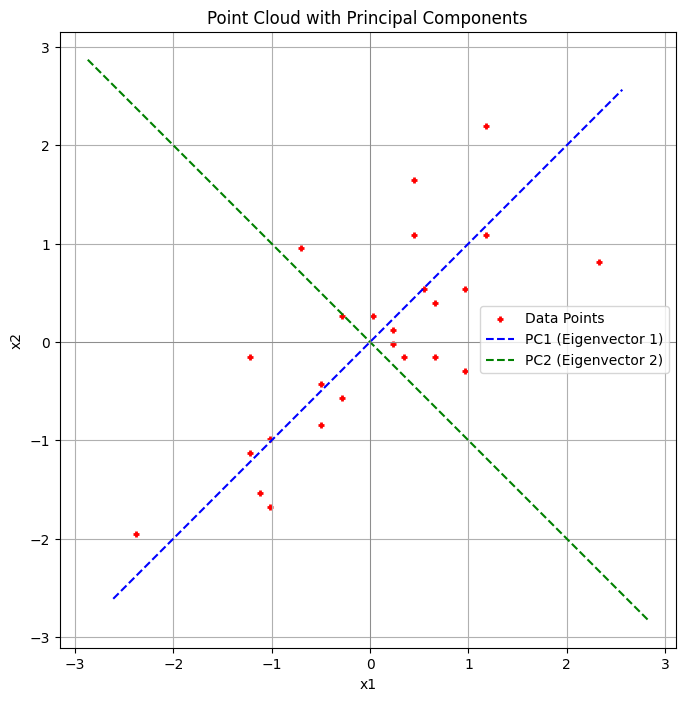

In [127]:
# Scatter plot of the data
plt.figure(figsize=(8, 8))
plt.scatter(x1_scaled, x2_scaled, s=20, c='red', marker='+', linewidth=2, label='Data Points')

# Compute slopes for principal components
pc1_slope = eigen_vecs[1, 0] / eigen_vecs[0, 0]  # Slope of PC1
pc2_slope = eigen_vecs[1, 1] / eigen_vecs[0, 1]  # Slope of PC2

# Draw principal component axes
abline(pc1_slope, 0, color='blue', label='PC1 (Eigenvector 1)')
abline(pc2_slope, 0, color='green', label='PC2 (Eigenvector 2)')

# Set axis properties
plt.gca().set_aspect(1)  # Equal scaling for axes
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Point Cloud with Principal Components')
plt.legend()
plt.grid()
plt.show()

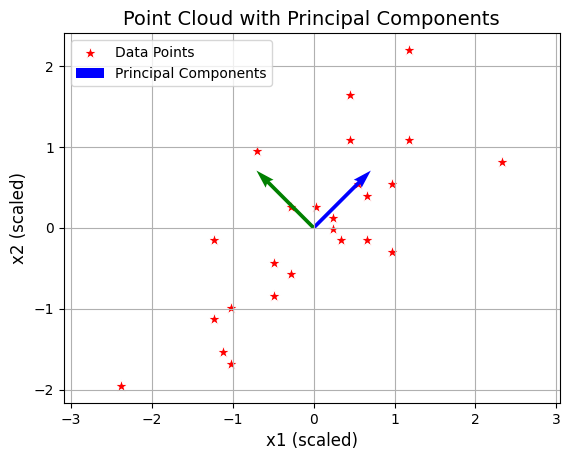

In [79]:
sns.scatterplot(x=x1_scaled, y=x2_scaled, color='red', marker='*', s=100, label='Data Points')

# Add the principal components
origin = np.array([[0, 0], [0, 0]])  # Origin for vectors
plt.quiver(*origin, eigen_vecs[0, :], eigen_vecs[1, :], color=['blue', 'green'], 
           scale=1, angles='xy', scale_units='xy', label='Principal Components')

# Set axis scaling and labels
plt.gca().set_aspect('equal', adjustable='datalim')
plt.xlabel('x1 (scaled)', fontsize=12)
plt.ylabel('x2 (scaled)', fontsize=12)
plt.title('Point Cloud with Principal Components', fontsize=14)

plt.legend()
plt.grid()
plt.show()

(f) Calculate the linear regression for $x_2$ from $x_1$ (the best in the least squares sense), i.e. the regression
line $x_2 = θ_1 x_1 + θ_0$ minimizing the squared $l_2$-norm of the prediction errors vector $e$ such that

$e_i = x_2^{(i)} − (\theta_1 x_1^{(i)} + \theta_0 )$ for 1 ≤ i ≤ m

The goal is to minimize:

$$\sum_{i=1}^m{(x_2^{(i)} − (θ_1 x_1^{(i)} + θ_0 ))^2}$$

Linear Regression Formula:
    Compute $\theta_1$​ and $\theta_0$​ using the least squares approach:
    $$\theta_1=\frac{Cov(x_1,x_2)}{Var(x_1)}, \theta_0=\overline{x}_2−\theta_0 \overline{x}_1$$

In [125]:
intercept = np.cov(x1, x2)[0,1] / np.var(x1)
slope = np.mean(x2) - intercept*np.mean(x1)
print("Linear Regression Coefficients:")
print("θ1 (slope):", slope)
print("θ0 (intercept):", intercept)

# Compute residuals
predicted_x2 = slope * np.array(x1) + intercept
residuals = np.array(x2) - predicted_x2
squared_error_norm = np.sum(residuals**2)
print("Sum of Squared Errors (L2 norm):", squared_error_norm)

Linear Regression Coefficients:
θ1 (slope): 43.790144961755544
θ0 (intercept): 0.5779122067534163
Sum of Squared Errors (L2 norm): 1597149161.299885


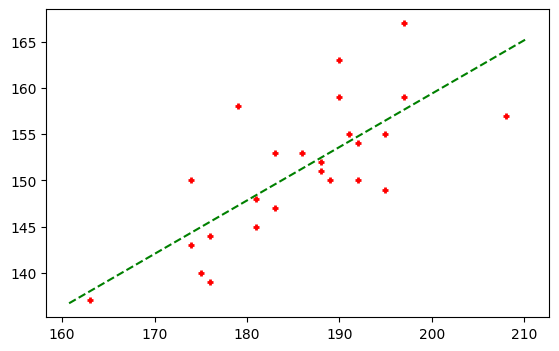

In [115]:
# Point cloud from x and y
_, ax = plt.subplots(figsize=(10,4))
ax = ax.scatter(x1, x2, s = 20, c = 'red', marker = '+', linewidth = 2)
# And linear regression line
plt.gca().set_aspect(1)
ax = abline(intercept, slope, color='g', label='Linear Regression line')

(g) Is this regression line identical to the first principal axis? Explain.

The regression line minimizes the vertical distances (differences in $x_2$​) between the data points and the line. In contrast, the first principal component minimizes the perpendicular distances from the points to the line. These are not the same objectives.

Differences Between Linear Regression and PCA:

- Linear Regression:
  - Assumes x1x1​ is the independent variable and $x_2$​ is dependent.
  - Minimizes errors in the $x_2$​-direction (vertical residuals).

- Principal Component Analysis (PCA):
  - Does not distinguish between $x_1$​ and $x_2$​.
  - Finds the direction of maximum variance in the data, minimizing perpendicular distances from the data points to the principal axis.


In PCA, the first principal component represents the direction that explains the greatest variance in the data.
The slope of the first principal component is related to the eigenvector corresponding to the largest eigenvalue of the covariance matrix. It is generally different from the slope $\theta_1$​ obtained from linear regression.

# 2. Q2: SVD and image compression

(a) First load the image (in color: RGB = red, green, blue) and convert it into a black & white image,
then into an A matrix with numpy, and check visually.

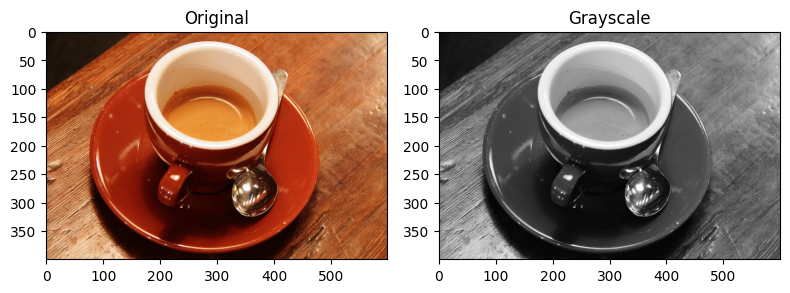

In [128]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
images = (
'astronaut',
'binary_blobs',
'brick',
'colorwheel',
'camera',
'cat',
'checkerboard',
'clock',
'coffee',
'coins',
'eagle',
'grass',
'gravel',
'horse',
'logo',
'page',
'text',
'rocket',
)
# We select the "coffee" image
caller = getattr(data, 'coffee')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

In [133]:
# We now convert the image into a matrix for processing with numpy
A = np.matrix(grayscale)
A

matrix([[0.05623333, 0.05651608, 0.04978902, ..., 0.73961804, 0.75166549,
         0.74579451],
        [0.05595059, 0.05651608, 0.05792275, ..., 0.73905255, 0.75081725,
         0.74297412],
        [0.05875608, 0.05846549, 0.05848824, ..., 0.73905255, 0.74494627,
         0.74886784],
        ...,
        [0.52715216, 0.64400353, 0.58801529, ..., 0.38923373, 0.37580941,
         0.31533412],
        [0.61655255, 0.59387137, 0.58352824, ..., 0.34640118, 0.31699294,
         0.31195529],
        [0.58801529, 0.57484392, 0.5757    , ..., 0.34721176, 0.30803373,
         0.29569569]])

(b) Perform an SVD on this matrix A, to determine the components U, S, V using the svd command
in numpy’s linalg library.

In [134]:
U, S, Vt = np.linalg.svd(A)
print("U = ", U.shape,
      "\nS = ", S.shape, 
      "\nVt = ", Vt.shape)

U =  (400, 400) 
S =  (400,) 
Vt =  (600, 600)


(c) Calculate an (approximate!) reconstruction of the image using only the first k rank-1 factors.
Visually check that the result corresponds (roughly) to the main features of the image (e.g. the
cup, the teaspoon next to the cup of coffee, · · · ). Write the formula for Ak . (the best rank-k
approximation of A with respect to any unitarily invariant norm).

The best rank-k approximation $A_k$​ of $A$ is given by:​

$$ A_k​ = U_k​ S_k ​V_k^T $$

In [141]:
def reconstruct_image(U, S, Vt, k):
    return U[:, :k] @ np.diag(S)[:k,:k] @ Vt[:k, :]

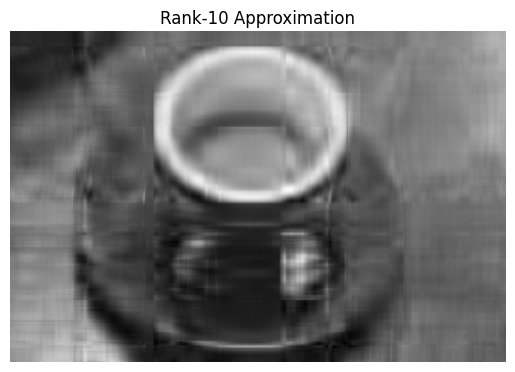

In [150]:
A_k = reconstruct_image(U, S, Vt, 10)
plt.imshow(A_k, cmap=plt.cm.gray)
plt.title(f"Rank-{10} Approximation")
plt.axis("off")
plt.show()

(d) Reconstruct with the first k = 2, 3, 4, 5, 10, 20, 30 and 100 rank-1 factors and display the results.

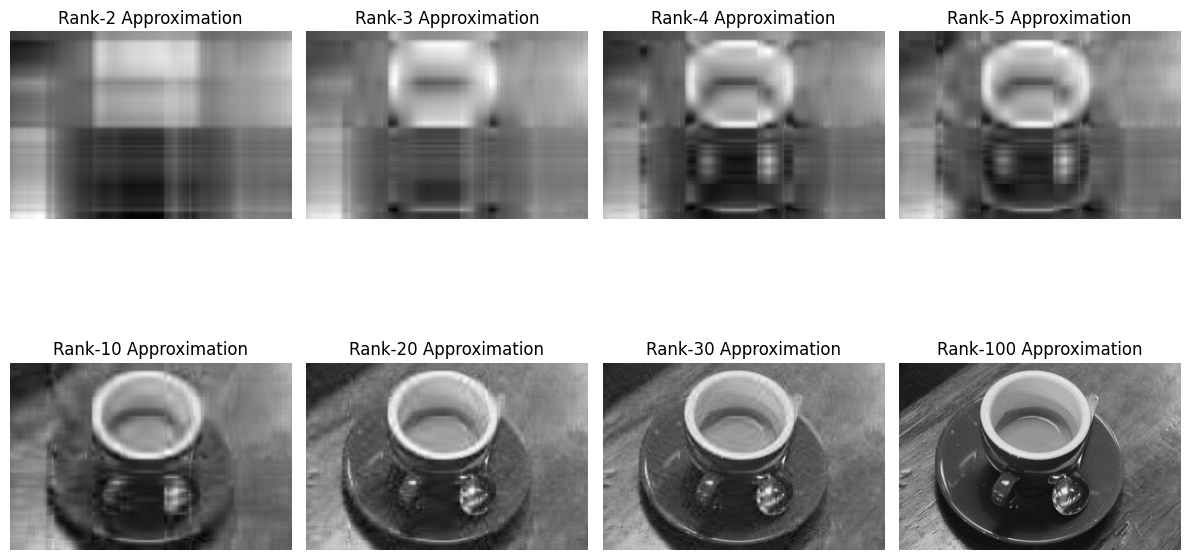

In [162]:
# Visualize approximations for different values of k
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
k_values = [2, 3, 4, 5, 10, 20, 30, 100]
axes = axes.ravel()

for i, k in enumerate(k_values):
    A_k = reconstruct_image(U, S, Vt, k)
    axes[i].imshow(A_k, cmap=plt.cm.gray)
    axes[i].set_title(f"Rank-{k} Approximation")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Best Rank-k Approximation:

- The $A_k$​ matrix approximates the original image $A$ using only the first k singular values and corresponding singular vectors.
    As k increases, the approximation improves, capturing more details.

Visual Observations:

- For small k, only the major features of the image are retained (e.g., the shape of the cup).
    Increasing k brings finer details (e.g., the texture of the coffee and the teaspoon).

(e) When is a satisfactory reconstruction possible (for which value of k)? Support your claim by
showing the cumulative singular values plot for the the different values of k.
What kind of information bring the rank-1 factors for k in the interval [20, 30] to the approximation
? Display the result.

1. When is a satisfactory reconstruction possible?

To determine when a satisfactory reconstruction is possible, we examine the cumulative explained variance using the singular values. The cumulative sum of the singular values divided by the total sum provides the proportion of the total variance explained by the top k singular values:
$$\text{Cumulative Explained Variance} = \frac{\sum_{i=1}^{k}{S_i}}{\sum_{i=1}^n{S_i}}$$


A common threshold is 90-95% of variance explained, which indicates that the reconstruction retains most of the significant information.

In [167]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(S) / np.sum(S)
cumulative_variance.shape

(400,)

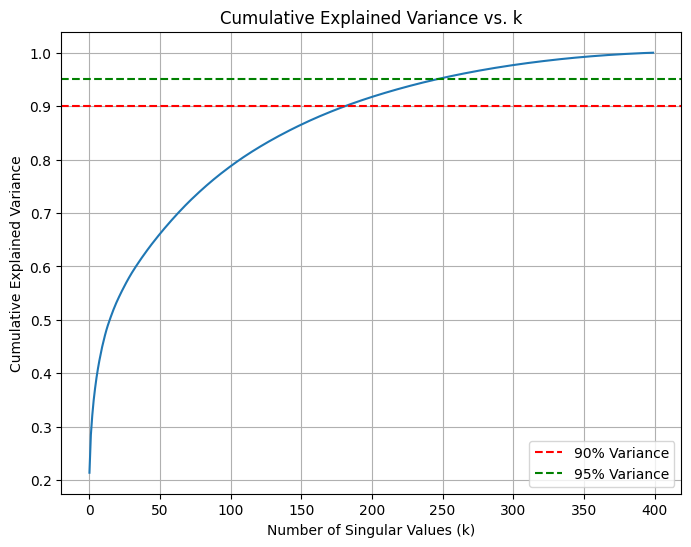

Number of singular values for 90% variance: 182
Number of singular values for 95% variance: 247


In [179]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
sns.lineplot(cumulative_variance)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. k')
plt.legend()
plt.grid()
plt.show()

# Identify the k for 90% and 95% variance
k_90 = np.argmax(cumulative_variance >= 0.9) + 1
k_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of singular values for 90% variance: {k_90}")
print(f"Number of singular values for 95% variance: {k_95}")

In [181]:
best_k = 182

This means that the reconstruction becomes "satisfactory" when we use 182 singular values, as it captures the majority of the important information in the image. If we want even more accuracy (capturing 95% of the variance), we would need 247 singular values

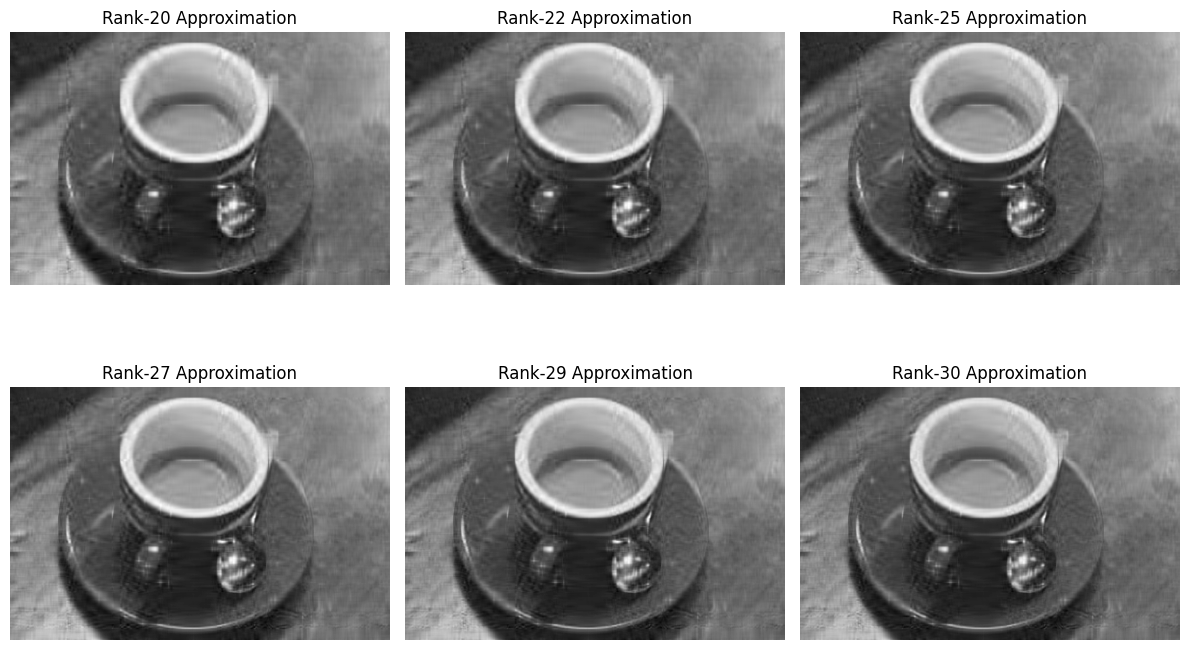

In [180]:
# Visualize rank-k approximations for k in [20, 30]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
k_values = [20, 22, 25, 27, 29, 30]
axes = axes.ravel()

for i, k in enumerate(k_values):
    A_k = reconstruct_image(U, S, Vt, k)
    axes[i].imshow(A_k, cmap=plt.cm.gray)
    axes[i].set_title(f"Rank-{k} Approximation")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

The additional rank-1 factors for k∈[20,30] refine the image, introducing finer details. However, since the significant variance is already captured by k=182 (90% variance) and k=247 (95% variance), the factors from k=20 to k=30 bring small improvements in accuracy, mostly refining textures and smaller features.

(f) Estimate the corresponding compression ratio.

In [186]:
def reconstruction_error(A, reconstructed_A):
    return np.linalg.norm(A - reconstructed_A)


original_size = U.size + S.size + Vt.size
compressed_size_k = U[:, :k].size + S[:k].size + Vt[:k, :].size
compressed_size_k

30030

In [ ]:
print(f"Original Size: {original_size}, Compressed Size for k={best_k}: {compressed_size_k}, Size Ration={compressed_size_k/original_size: 0.3}")

reconstructed_A = reconstruct_image(U, S, Vt, best_k)
print('Error: ', reconstruction_error(A, reconstructed_A))

Original Size: 520400, Compressed Size for k=182: 30030, Size Ration= 0.0577
Error:  7.148725477202415


In [194]:
# Choose k = 247 (for 95% variance)
k = 247

# Compute the compression ratio
original_size = m * n
compressed_size = k * (m + n + 1)
compression_ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression Ratio (k={k}): {compression_ratio:.2f}")


Original size: 240000
Compressed size: 247247
Compression Ratio (k=247): 0.97
